In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [40]:
data = pd.read_csv('churned_data.csv').iloc[:,1:]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 141 entries, device_id_proc to churned
dtypes: float64(138), int64(2), object(1)
memory usage: 21.5+ MB


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_mean,20000.0,44.718831,101.622921,-8.561676e+03,16.392838,38.033323,56.163836,2677.739286
duration_std,20000.0,156.808357,1324.357358,0.000000e+00,25.922408,54.159778,87.039682,162178.194496
duration_cv,20000.0,173.753638,1534.628083,-2.146153e+05,131.807805,144.022318,165.880415,7149.778984
duration_total_time_spent,20000.0,7021.107670,46355.180108,-4.965772e+06,297.082250,2182.536500,9045.710500,402622.491000
sum_revenue,20000.0,0.590705,1.077964,0.000000e+00,0.000000,0.105000,0.835000,24.249514
...,...,...,...,...,...,...,...,...
"('x0_iOS 14.7',)",20000.0,0.006250,0.078811,0.000000e+00,0.000000,0.000000,0.000000,1.000000
"('x0_iOS 14.7.1',)",20000.0,0.813650,0.389399,0.000000e+00,1.000000,1.000000,1.000000,1.000000
"('x0_iOS 14.8',)",20000.0,0.026650,0.161062,0.000000e+00,0.000000,0.000000,0.000000,1.000000
"('x0_iOS 15.0',)",20000.0,0.005250,0.072268,0.000000e+00,0.000000,0.000000,0.000000,1.000000


In [43]:
data.iloc[:,:10].describe().T

,count,mean,std,min,25%,50%,75%,max
duration_mean,20000.0,44.718831,101.622921,-8.561676e+03,16.392838,38.033323,56.163836,2677.739286
duration_std,20000.0,156.808357,1324.357358,0.000000e+00,25.922408,54.159778,87.039682,162178.194496
duration_cv,20000.0,173.753638,1534.628083,-2.146153e+05,131.807805,144.022318,165.880415,7149.778984
duration_total_time_spent,20000.0,7021.107670,46355.180108,-4.965772e+06,297.082250,2182.536500,9045.710500,402622.491000
sum_revenue,20000.0,0.590705,1.077964,0.000000e+00,0.000000,0.105000,0.835000,24.249514
no_rewarded_impression,20000.0,132.183800,184.521905,1.000000e+00,18.000000,55.000000,173.000000,2368.000000
std_coin,20000.0,107.644322,108.691032,0.000000e+00,85.636456,109.429255,127.869363,9880.852823
mean_coin,20000.0,230.689158,162.451057,0.000000e+00,120.767932,200.368778,293.576007,9584.666667
last_coin,20000.0,195.882560,163.025062,0.000000e+00,140.000000,195.882560,195.882560,20000.000000


In [44]:
data.columns[1:10]

Index(['duration_mean', 'duration_std', 'duration_cv',
       'duration_total_time_spent', 'sum_revenue', 'no_rewarded_impression',
       'std_coin', 'mean_coin', 'last_coin'],
      dtype='object')

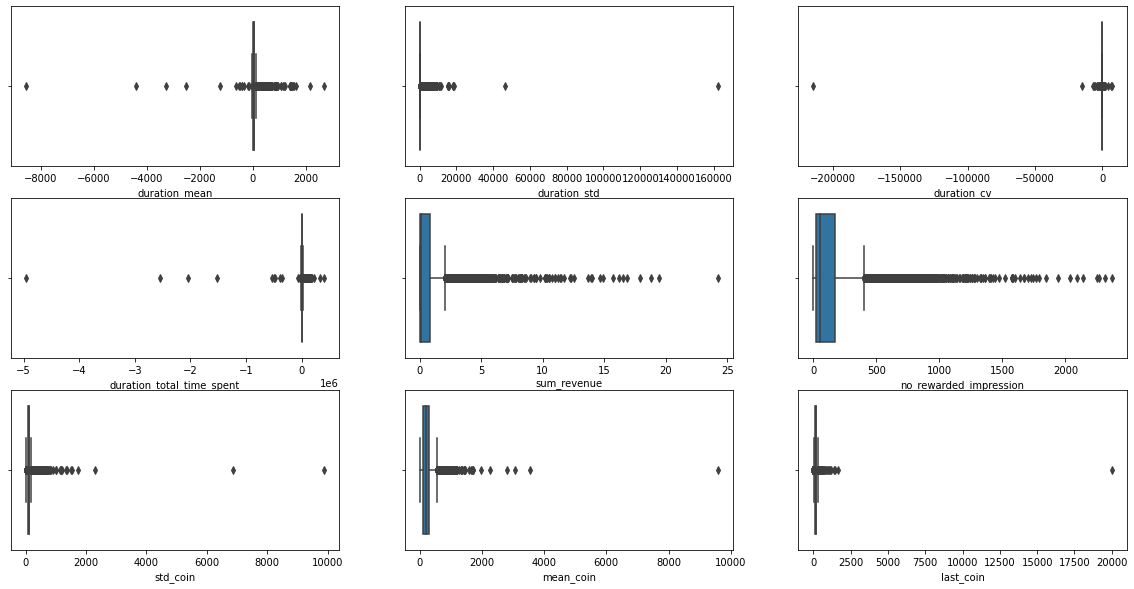

In [54]:
plt.figure(figsize=(20,10))
for count, column in enumerate(data.columns[1:10]):
    plt.subplot(3, 3, count + 1)
    sns.boxplot(x = data[column])
plt.show()

<AxesSubplot:xlabel='sum_revenue', ylabel='Count'>

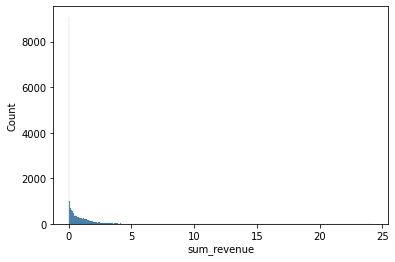

In [59]:
sns.histplot(x = data.sum_revenue)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'duration_mean'),
  Text(1.5, 0, 'duration_std'),
  Text(2.5, 0, 'duration_cv'),
  Text(3.5, 0, 'duration_total_time_spent'),
  Text(4.5, 0, 'sum_revenue'),
  Text(5.5, 0, 'no_rewarded_impression'),
  Text(6.5, 0, 'std_coin'),
  Text(7.5, 0, 'mean_coin'),
  Text(8.5, 0, 'last_coin')])

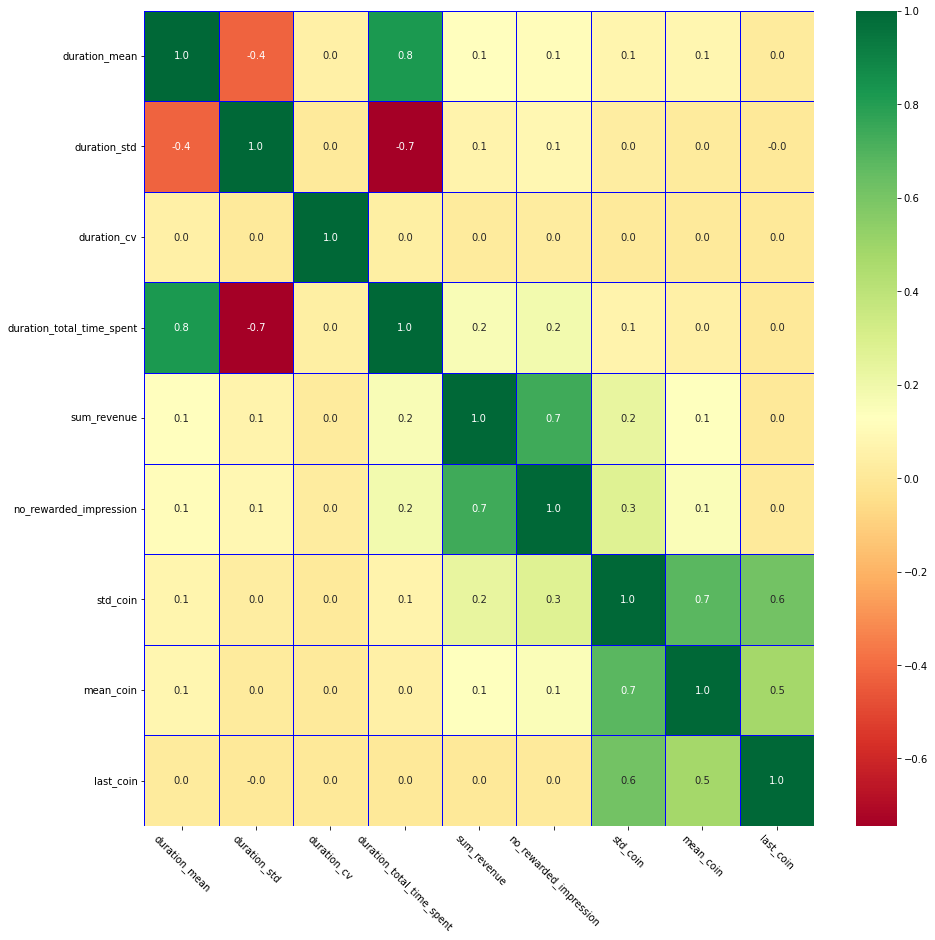

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,:10].corr(), annot=True, fmt='.1f', linecolor='blue', linewidths=1, cmap='RdYlGn')
plt.xticks(rotation=315)

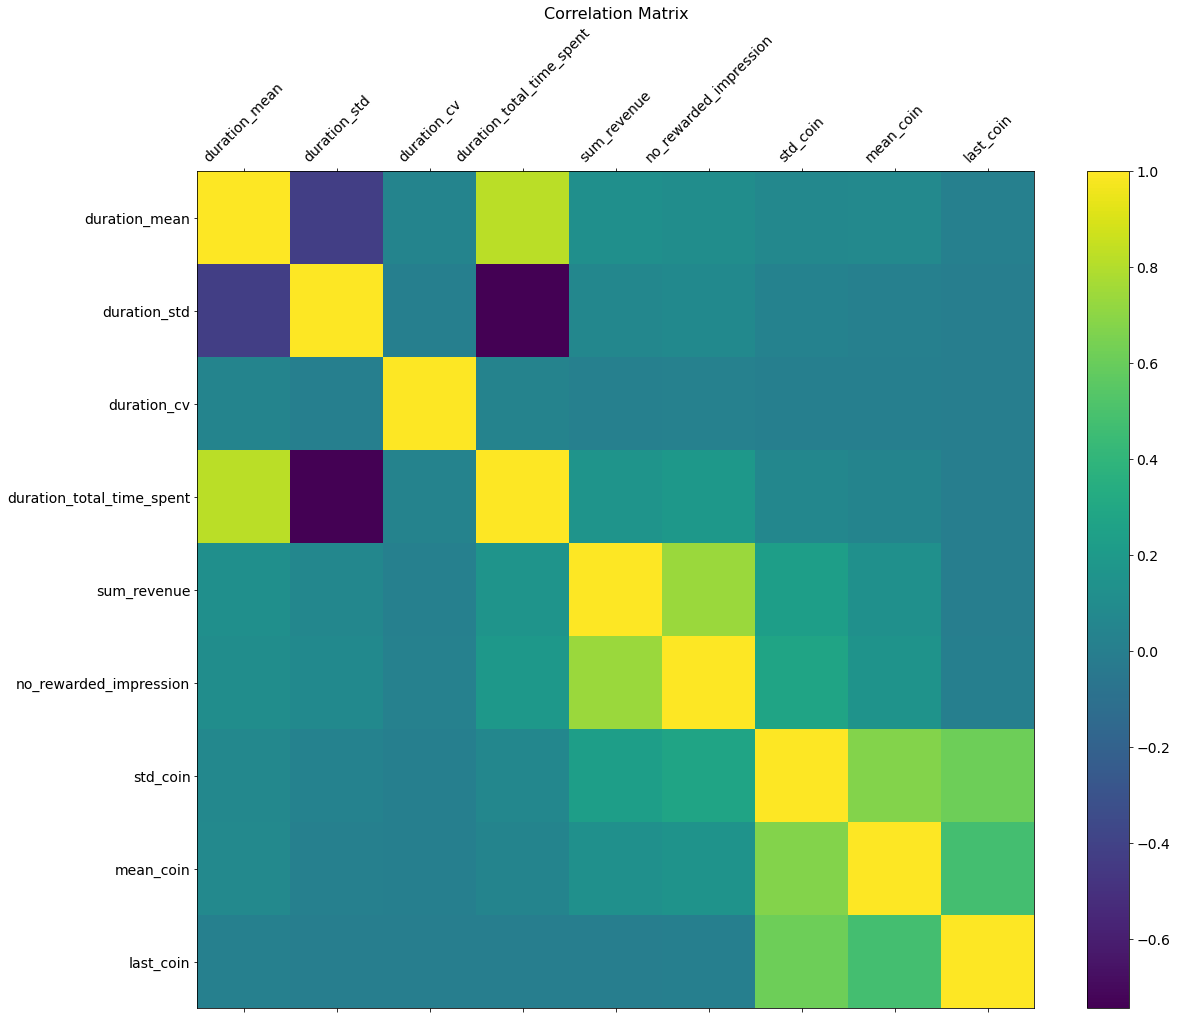

In [81]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.iloc[:,:10].corr(), fignum=f.number)
plt.xticks(range(data.iloc[:,:10].select_dtypes(['number']).shape[1]), data.iloc[:,:10].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.iloc[:,:10].select_dtypes(['number']).shape[1]), data.iloc[:,:10].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

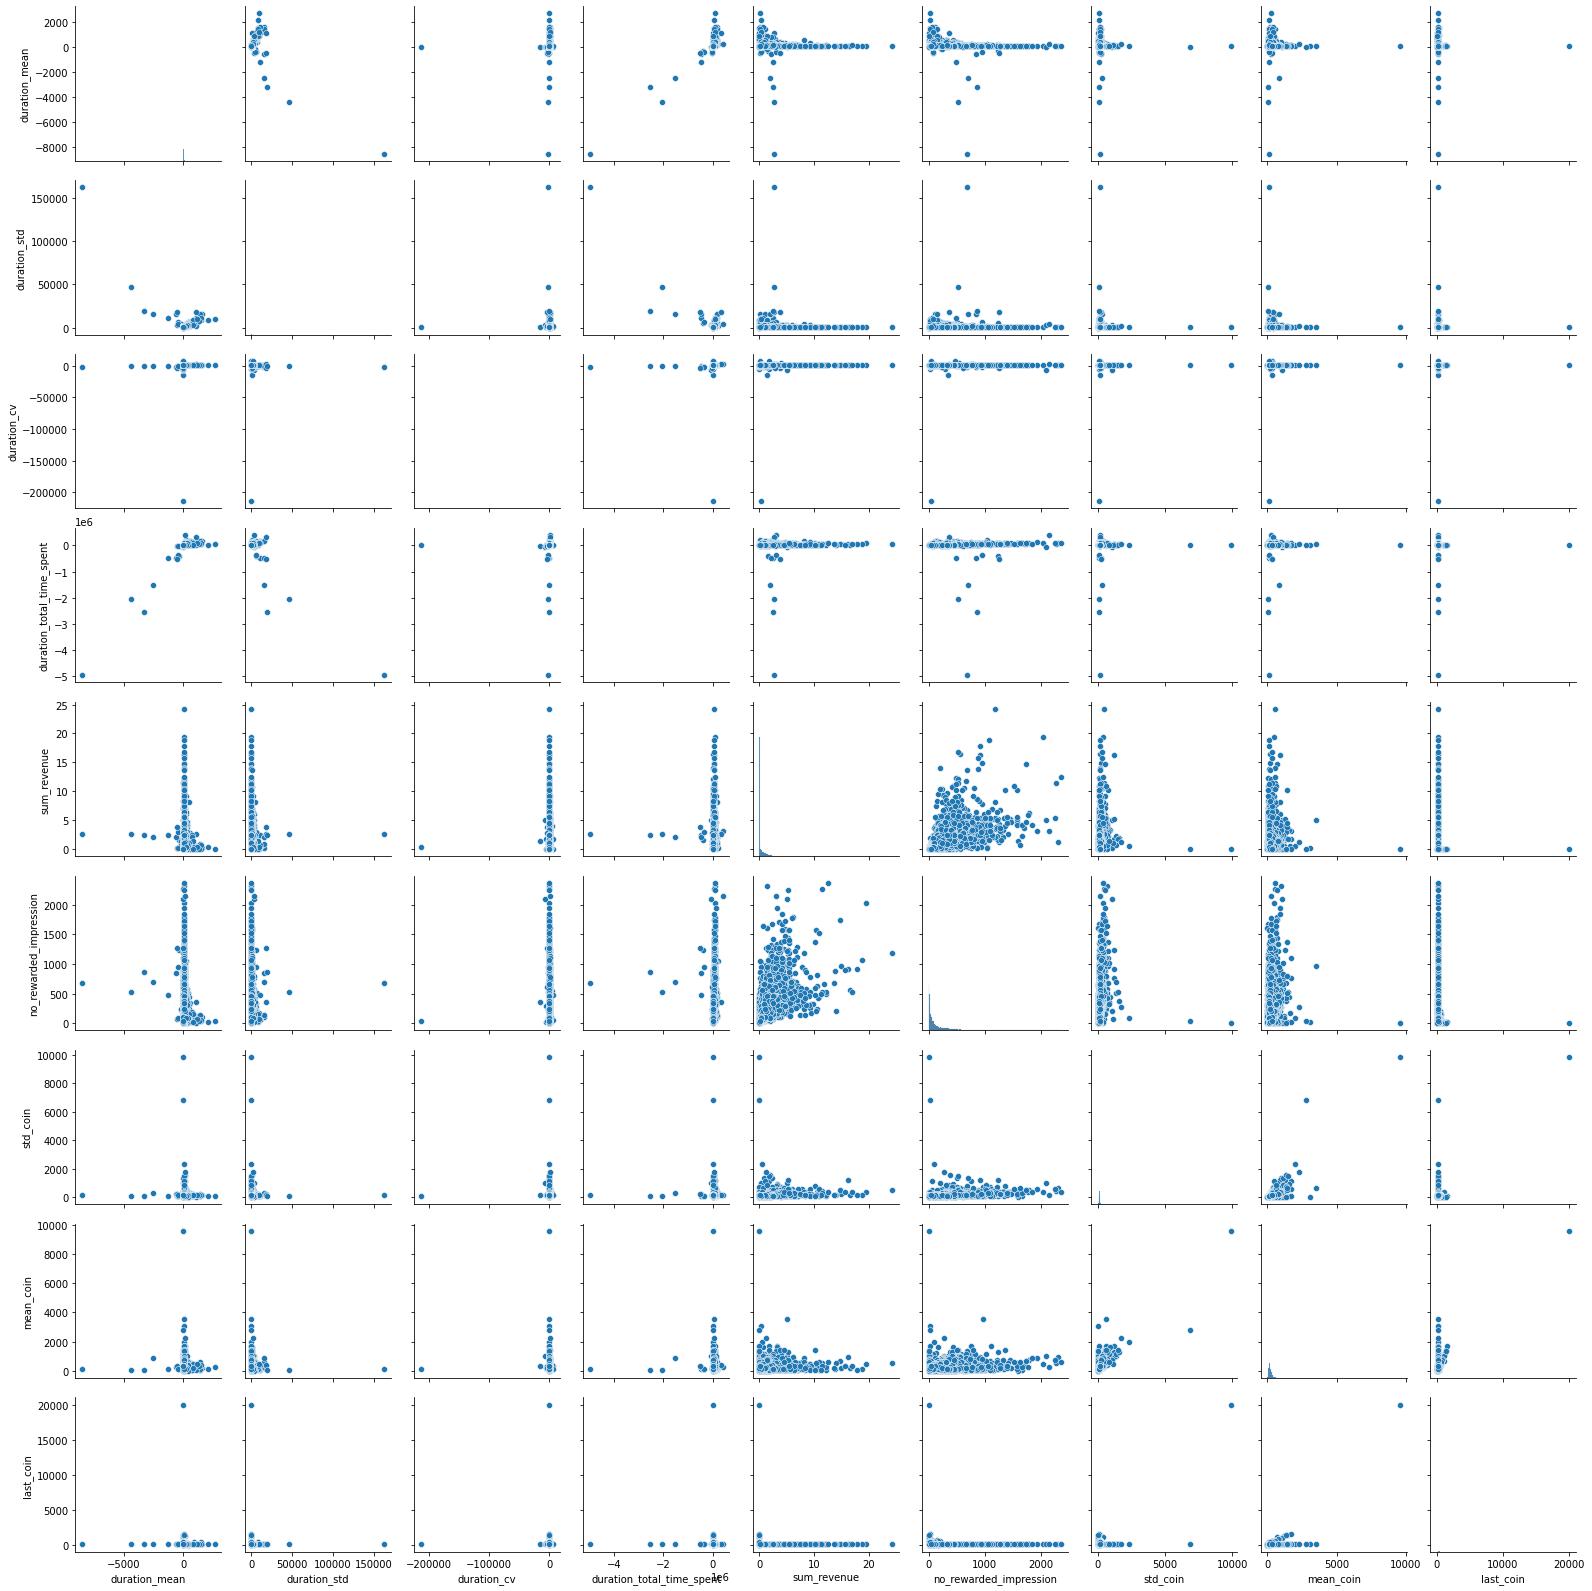

In [84]:
sns.pairplot(data.iloc[:,:10])